# PyTorch Data Reading Pipeline - read image files

### CelebA Dataset: Large-scale CelebFaces Attributes (CelebA) Dataset

![alt text](utils/1_1_celeba_intro.png "")

- 1. Data:
    - Paperwithcode intro: https://paperswithcode.com/dataset/celeba
    - Official website: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
    - Data folder: https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
    - Data download link: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=drive_link&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
    - Label download link: https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=drive_link&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q

- 2. Library
    - pytorch
    - pandas
    - matplotlib

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset
print(torch.__version__)

2.0.1


In [2]:
os.listdir()

['.DS_Store',
 'LICENSE',
 '1. PyTorch Data Reading Pipeline - read image files.ipynb',
 'utils',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 'venv',
 '.git',
 'data',
 '.idea']

In [3]:
data_folder = 'data/celeba/img_align_celeba'
label_file = 'data/celeba/list_attr_celeba.txt'

## 1. Images

image shape:  (218, 178, 3)
array type:  <class 'numpy.ndarray'>
data type:  <class 'numpy.uint8'>
values:  [[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]]


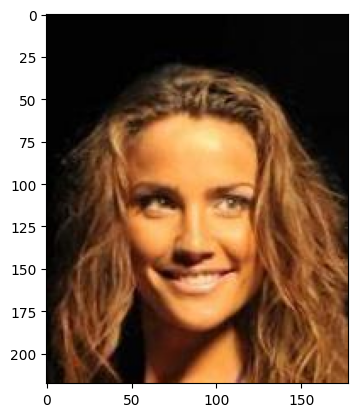

In [4]:
i = plt.imread(f"{data_folder}/146136.jpg")

print('image shape: ', i.shape)
print('array type: ', type(i))
print('data type: ', type(i[0][0][0])) #unit8: unsigned integer, 2^0 to 2^8, [0, 255]
print('values: ', i[:2])

plt.imshow(i)

In [5]:
def get_file_names(data_folder):
    # 获取所有图片的保存路径，保存在list中
    if not os.path.isdir(data_folder):
        print(f"{data_folder} does not exist.")
    
    files = os.listdir(data_folder)
    res = [data_folder + "/" + f for f in files]
    return res

In [6]:
image_files = get_file_names(data_folder)
print(f"total number of images: {len(image_files)}")
image_files[:5]

total number of images: 202599


['data/celeba/img_align_celeba/052628.jpg',
 'data/celeba/img_align_celeba/110369.jpg',
 'data/celeba/img_align_celeba/161590.jpg',
 'data/celeba/img_align_celeba/065084.jpg',
 'data/celeba/img_align_celeba/108526.jpg']

## 2. Labels

In [7]:
columns = ['name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald',
'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry',
'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose',
'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
'Wearing_Necklace', 'Wearing_Necktie', 'Young']

In [8]:
temp = pd.read_csv(label_file, skiprows=2, header=None, names=['data'])
all_label_df = pd.DataFrame(temp['data'].str.split().values.tolist(), columns=columns)
all_label_df.head()

,name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [9]:
label_df = all_label_df[['name', 'Eyeglasses']]
print(f"total number of labels: {len(label_df)}")
label_df.head()
# -1: 没有戴眼镜
# 1: 戴眼镜的

total number of labels: 202599


,name,Eyeglasses
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


## 3. PyTorch Dataset

In [10]:
class ImageDataset(Dataset):
    def __init__(self, image_files, label_df):
        self.image_files = image_files
        self.label_df = label_df
        
        # 图像的数量和标签的数量必须要相同
        assert(len(self.image_files) == len(self.label_df)), "The number of images IS NOT EQUAL to the number of labels"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = plt.imread(self.image_files[idx]) # numpy array
        x = torch.from_numpy(image) # numpy array 转化成 tensor, torch.Size([218, 178, 3])
        
        image_name = self.image_files[idx].split('/')[-1]
        label = self.label_df[self.label_df['name'] == image_name]['Eyeglasses'].tolist()[0]
        label = float(label) # float
        y = torch.tensor(label) # float转化成 tensor
        
        return x, y

In [25]:
train_data = ImageDataset(image_files=image_files, label_df=label_df)
train_dataloader = DataLoader(train_data, batch_size=10)

Feature batch shape: torch.Size([20, 218, 178, 3])
Labels batch shape: torch.Size([20])


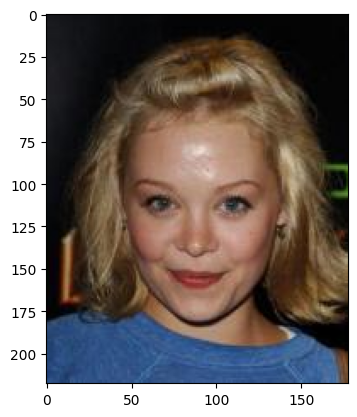

Label: -1.0


In [27]:
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[9].squeeze()
label = train_labels[9]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [23]:
train_labels

tensor([-1., -1.])

In [24]:
for data in train_dataloader:
    x, y = data
    print(x.shape)
    print(y.shape)
    break

torch.Size([2, 218, 178, 3])
torch.Size([2])
